In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tradingeconomics as te
from dotenv import load_dotenv
import plotly.express as px
from IPython.display import Image
import os
from urllib.request import urlopen
import datetime as dt  # Correct import for datetime


api_key = os.getenv('TRADING_ECONOMICS_API_KEY')
te.login(api_key)
load_dotenv() 

True

Data Exploratory

In [2]:
try:
    commodities_data = te.getMarketsData(marketsField='commodities', output_type='df') 
except Exception as e:
    print("Error fetching commodities data:", e)
commodities_data

,Symbol,Ticker,Name,Country,Date,State,Last,Close,CloseDate,Group,...,yesterday,lastWeek,lastMonth,lastYear,startYear,decimals,unit,frequency,StartDate,LastUpdate
0,C 1:COM,C A,Corn,commodity,2024-06-06T16:32:56.107,OPEN,449.0220,449.0220,2024-06-06T16:33:00,Agricultural,...,439.2500,448.7500,467.0000,525.0000,471.2500,4.0,USd/BU,Live,1912-05-01T00:00:00,2024-06-06T16:33:00
1,IUC:COM,IUC,Indium,commodity,2024-06-06T00:00:00,CLOSED,3075.0000,3075.0000,2024-06-06T00:00:00,Industrial,...,3075.0000,3075.0000,2875.0000,1495.0000,2005.0000,0.0,CNY/Kg,daily,2017-11-24T00:00:00,2024-06-06T15:30:00
2,MVNLRTR:IND,MVNLRTR,Nuclear Energy Index,commodity,2024-06-06T16:33:19.707,OPEN,31.0600,31.0600,2024-06-06T16:33:00,Index,...,30.8000,31.8500,31.8300,21.3700,27.6900,2.0,USD,Delayed,2010-11-05T00:00:00,2024-06-06T16:33:00
3,KSP:COM,KSP,Kraft Pulp,Commodity,2024-06-06T00:00:00,CLOSED,5968.0000,5968.0000,2024-06-06T00:00:00,Industrial,...,5936.0000,6138.0000,6224.0000,4952.0000,5620.0000,2.0,CNY/T,Daily,2018-11-27T00:00:00,2024-06-06T13:13:00
4,NOSMFZ:COM,NOSMFZ,Salmon,Commodity,2024-06-06T00:00:00,CLOSED,84.5000,84.5000,2024-06-06T00:00:00,Livestock,...,84.5000,84.5000,92.4500,89.6600,99.8400,2.0,NOK/KG,Daily,2012-05-25T00:00:00,2024-06-06T15:31:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,HO1:COM,HO1,Heating Oil,commodity,2024-06-06T16:33:00.427,OPEN,2.3547,2.3547,2024-06-06T16:33:00,Energy,...,2.3130,2.3614,2.4588,2.3970,2.4952,4.0,USD/Gal,Live,1980-01-02T00:00:00,2024-06-06T16:33:00
88,XB1:COM,XB1,Gasoline,commodity,2024-06-06T16:33:00.42,OPEN,2.4010,2.4010,2024-06-06T16:33:00,Energy,...,2.3632,2.3932,2.5349,2.5405,2.1258,4.0,USD/Gal,Live,2005-10-03T00:00:00,2024-06-06T16:33:00
89,NG1:COM,NG1,Natural gas,commodity,2024-06-06T16:33:26.877,OPEN,2.7523,2.7523,2024-06-06T16:33:00,Energy,...,2.7570,2.5720,2.2070,2.4330,2.3270,4.0,USD/MMBtu,Live,1990-04-03T00:00:00,2024-06-06T16:33:00
90,CO1:COM,COG1,Brent,commodity,2024-06-06T16:33:48.733,OPEN,79.9486,79.9486,2024-06-06T16:34:00,Energy,...,78.4100,81.8800,83.1600,76.8400,77.0400,3.0,USD/Bbl,Live,1970-04-15T00:00:00,2024-06-06T16:34:00


In [3]:
commodities_data.columns

Index(['Symbol', 'Ticker', 'Name', 'Country', 'Date', 'State', 'Last', 'Close',
       'CloseDate', 'Group', 'URL', 'Importance', 'DailyChange',
       'DailyPercentualChange', 'WeeklyChange', 'WeeklyPercentualChange',
       'MonthlyChange', 'MonthlyPercentualChange', 'YearlyChange',
       'YearlyPercentualChange', 'YTDChange', 'YTDPercentualChange',
       'day_high', 'day_low', 'yesterday', 'lastWeek', 'lastMonth', 'lastYear',
       'startYear', 'decimals', 'unit', 'frequency', 'StartDate',
       'LastUpdate'],
      dtype='object')

In [4]:
commodities_group = commodities_data.query('Group == "Metals" or Group == "Industrial"')[['Symbol','Name', 'Close', 'Group', 'frequency', 'unit', 'Date']]
commodities_group

,Symbol,Name,Close,Group,frequency,unit,Date
1,IUC:COM,Indium,3075.0000,Industrial,daily,CNY/Kg,2024-06-06T00:00:00
3,KSP:COM,Kraft Pulp,5968.0000,Industrial,Daily,CNY/T,2024-06-06T00:00:00
5,POL:COM,Polyethylene,8350.0000,Industrial,Daily,CNY/T,2024-06-05T00:00:00
7,SODASH:COM,Soda Ash,2170.0000,Industrial,Daily,CNY/T,2024-06-06T00:00:00
8,PYL:COM,Polypropylene,7563.0000,Industrial,Daily,CNY/T,2024-06-05T00:00:00
9,PVC:COM,Polyvinyl,6137.0000,Industrial,Daily,CNY/T,2024-06-05T00:00:00
11,SREMNDM:COM,Neodymium,462500.0000,Industrial,daily,CNY/T,2024-06-06T00:00:00
15,UFI:COM,Di-ammonium,527.5000,Industrial,Daily,USD/T,2024-06-05T00:00:00
16,UFB:COM,Urea,297.5000,Industrial,Daily,USD/T,2024-06-05T00:00:00
17,TTSG:COM,Titanium,51.0000,Metals,Daily,CNY/KG,2024-06-06T00:00:00


In [5]:
critical_minerals = {
    'SCO:COM': 'Iron Ore',  # Assuming 'SCO:COM' is the symbol for Iron Ore
    'JBP:COM': 'Steel',     # Assuming 'JBP:COM' is the symbol for Steel
    'LMAHDS03:COM': 'Aluminum',  # Assuming 'LMAHDS03:COM' is the symbol for Aluminum
    'LC:COM': 'Lithium',    # Assuming 'LC:COM' is the symbol for Lithium
    'LCO1:COM': 'Cobalt',   # Assuming 'LCO1:COM' is the symbol for Cobalt
    'LN1:COM': 'Nickel',    # Assuming 'LN1:COM' is the symbol for Nickel
    'HG1:COM': 'Copper',    # Assuming 'HG1:COM' is the symbol for Copper
    'IMR:COM': 'Manganese'  # Assuming 'IMR:COM' is the symbol for Manganese
}

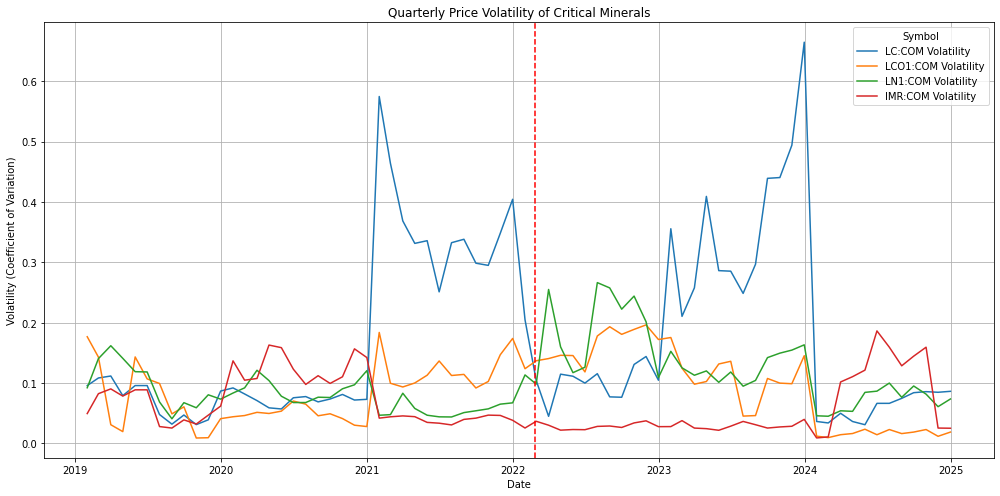

In [79]:
symbols = ['SCO:COM', 'JBP:COM', 'LMAHDS03:COM', 'LC:COM', 'LCO1:COM', 'LN1:COM', 'HG1:COM', 'IMR:COM']
critical_symbols = ['LC:COM', 'LCO1:COM', 'LN1:COM', 'IMR:COM']

# raw_df = te.getHistorical(symbol=symbols, initDate='2019-01-01',endDate=pd.to_datetime('today').strftime('%Y-%m-%d'))    
# raw_df = pd.DataFrame(raw_df)
# raw_df['Date'] = pd.to_datetime(raw_df['Date'])  # Convert 'Date' to datetime
# raw_df.set_index('Date', inplace=True)  # Set 'Date' as the index

#Assume raw_df is preloaded with the correct date indices and contains close prices
result_df = pd.DataFrame()

# Store volatility data
quarterly_volatility = {}

# Process each symbol's data
for symbol in critical_symbols:
    if symbol in raw_df['Symbol'].unique():
        symbol_data = raw_df[raw_df['Symbol'] == symbol].copy()
        symbol_data.index = pd.to_datetime(symbol_data.index)  # Ensure index is datetime

        # Calculate quarterly volatility directly
        std_dev = symbol_data['Close'].resample('M').std()
        mean_price = symbol_data['Close'].resample('M').mean()

        # Coefficient of Variation (Std Dev / Mean) for each quarter
        cv = std_dev / mean_price

        # Store computed quarterly volatility in the dictionary
        quarterly_volatility[symbol] = cv

        # Forward fill the volatility values within each quarter
        # First, assign the calculated quarterly volatility back to the daily data
        symbol_data['Quarterly Volatility'] = cv.resample('D').ffill()

        # Concatenate the symbol data back to the result DataFrame
        result_df = pd.concat([result_df, symbol_data])

# Visualization of quarterly volatilities
fig, ax = plt.subplots(figsize=(14, 7))
for symbol, data in quarterly_volatility.items():
    ax.plot(data.index, data.values, label=f'{symbol} Volatility')
ax.set_title('Quarterly Price Volatility of Critical Minerals')
ax.set_xlabel('Date')
ax.set_ylabel('Volatility (Coefficient of Variation)')
ax.legend(title='Symbol')
plt.grid(True)
# start date of the war
plt.axvline(dt.datetime(2022, 2, 24), color='red', linestyle='--', label='Russia-Ukraine war start date')

plt.tight_layout()
plt.show()

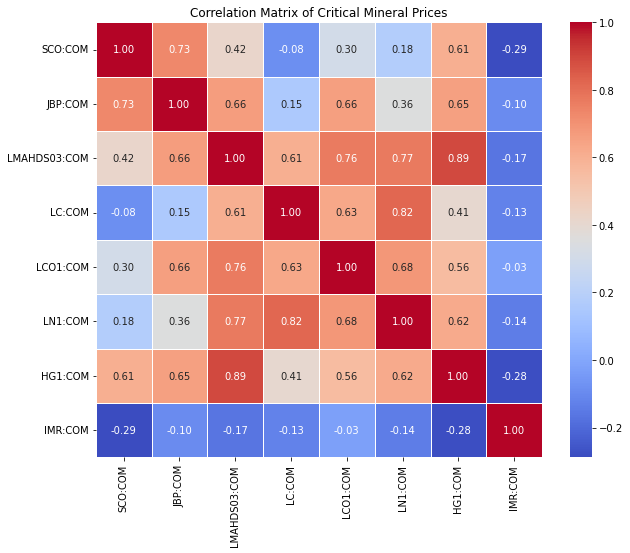

In [33]:
close_prices = pd.DataFrame(index=raw_df.index.unique())
for symbol in symbols:
    if symbol in raw_df['Symbol'].unique():
        symbol_data = raw_df[raw_df['Symbol'] == symbol]
        close_prices[symbol] = symbol_data['Close']

close_prices.dropna(inplace=True)
correlation_matrix = close_prices.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Critical Mineral Prices')
plt.show()

Treemap for Critical Mineral Annual Percentage Change

In [11]:
commodities_data = te.getMarketsData(marketsField='commodities', output_type='df') 
commodities = commodities_data.rename(columns={'YearlyPercentualChange': 'Year%Change'})
commodities['Name'] = commodities['Name'].str.replace("Index", "")
fig = px.treemap(commodities, path=[px.Constant("Commodities"),'Group', 'Name'], color='Year%Change', color_continuous_scale='rdylgn',color_continuous_midpoint=0)
fig.update_layout(
    margin = dict(t=0, l=0, r=0, b=0),autosize=False,
    width=1200,
    height=700
)
fig.update_traces(hovertemplate='%{label}<br>Year % Change= %{customdata[0]}%<extra></extra>')
fig.show()

In [72]:
# critical_minerals = [
#     'Iron Ore',  # Assuming 'Iron Ore' maps to 'SCO:COM'
#     'Steel',     # Assuming 'Steel' maps to 'JBP:COM'
#     'Aluminum',  # Assuming 'Aluminum' maps to 'LMAHDS03:COM'
#     'Lithium',   # Assuming 'Lithium' maps to 'LC:COM'
#     'Cobalt',    # Assuming 'Cobalt' maps to 'LCO1:COM'
#     'Nickel',    # Assuming 'Nickel' maps to 'LN1:COM'
#     'Copper',    # Assuming 'Copper' maps to 'HG1:COM'
#     'Manganese'  # Assuming 'Manganese' maps to 'IMR:COM'
# ]

# filtered_commodities = commodities[commodities['Name'].isin(critical_minerals)]
# # Create a treemap visualization
# fig_cm = px.treemap(
#     filtered_commodities,
#     path=[px.Constant("Commodities"), 'Group', 'Name'],
#     color='Year%Change',
#     color_continuous_scale='RdYlGn',
#     color_continuous_midpoint=0
# )
# fig_cm.update_traces(hovertemplate='%{label}<br>Year % Change= %{customdata[0]}%<extra></extra>')
# fig_cm.show()
